In [1]:
import sys
sys.path.append("../../../") # Where to find utilssphering
import utilssphering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [2]:
# Read CSV
match_rep_df = pd.read_csv("../../../checkpoints/match_rep_df.csv")
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,NaN,1,10,6,...,0.000144,False,0.269727,53.333333,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.320855,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
3,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,False,0.329074,45.555556,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.389170,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,False,0.628379,20.000000,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",6.976744,0.772160,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567
359,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,False,0.666818,21.111111,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",9.302326,0.790813,452567
360,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_40x,Confocal,9,4.0,1,40,6,...,0.080201,True,0.193787,53.333333,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.234702,116595


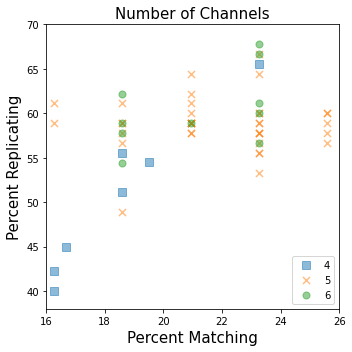

In [4]:
# A 

group = "Number_of_channels"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

# utilssphering.group_plot(
#     df=group_df, 
#     x="Mean_Percent_Matching", 
#     y="Mean_Percent_Replicating",
#     group=group,
#     error_x="SD_Percent_Matching",
#     error_y="SD_Percent_Replicating",
#     fig=fig,
#     ax_=ax
# )
utilssphering.group_plot(
    df=df_subset,
    x="Percent_Matching", 
    y="Percent_Replicating",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    alpha=0.5,
    use_markers=True,
    s=50,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title="Number of Channels",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

        
fig.savefig("(A)-rep-vs-match-number_of_channels.png", dpi=300)

In [5]:
# B 

# Find channel names from load_data_csvs
def find_channel_names(metadata_df, load_data_path):
    plates = []
    df = metadata_df.copy()
    for root, dirs, files in os.walk(load_data_path):
        for file in files:
            if "load_data_with_illum.csv" in file:
                path = os.path.join(root, file)
                plate = os.path.split(path)[0].split("/")[-1]
                plates.append(plate)
                if plate not in metadata_df["Assay_Plate_Barcode"].values:
                    print("No channel name source found for: ", path, plate)
                columns = pd.read_csv(path).columns.tolist()
                channels = sorted([i.replace("FileName_Orig", "") for i in columns if "FileName_Orig" in i])
                channels = ", ".join(channels)
                # df.loc[df["Assay_Plate_Barcode"] == plate, "channel_names"] = ", ".join(channels)
                df.loc[df["Assay_Plate_Barcode"] == plate, "channel_names"] = channels
    return df

def search_correlations(metadata_df, profile_path):
    """

    """
    df_list = []
    # metadata_df = metadata_df[~metadata_df["Batch"].str.contains("siteSub")]
    df = metadata_df.copy()
    df = df[~df["Batch"].str.contains("siteSub")]
    for ind, row in df.iterrows():
        df_path = os.path.join(profile_path, row["Batch"], row["Assay_Plate_Barcode"], f"{row['Assay_Plate_Barcode']}.csv.gz")
        print(df_path)
        load_df = pd.read_csv(df_path)
        cols = [i for i in load_df.columns if "Correlation" in i]
        # Mask data so we only gather the correlation features for aggregation
        load_df = load_df[cols]
        # For the masked dataset (which represents one plate), aggregate all well values. 384 rows will be aggregated into one.
        load_df = load_df.agg(np.mean).to_frame().transpose()
        # Since the DF was masked by [cols], add back in the Batch, Assay_Plate_Barcode and channel_names, based on the row info
        load_df["Batch"], load_df["Assay_Plate_Barcode"], load_df["channel_names"] = [row["Batch"], row["Assay_Plate_Barcode"], row["channel_names"]]
        df_list.append(load_df)
    out_df = pd.concat(df_list)
    return out_df

experiment_df = find_channel_names(match_rep_df, "../../../../jump-scope/load_data_csv/")
corr_df = search_correlations(experiment_df, "../../../../jump-scope/profiles/")

# Select data that contains 6-channels
plot_corr_df = corr_df[(corr_df["channel_names"] == "Actin, DNA, ER, Golgi, Mito, RNA")]

# Find a subset of combinations
# mask_cols = corr_df.columns[corr_df.columns.str.contains("Cells_Correlation_Correlation_Actin")]
mask_cols = corr_df.columns[corr_df.columns.str.contains("Cells_Correlation_Correlation")]
plot_corr_df = plot_corr_df[mask_cols]

plot_corr_df = plot_corr_df.agg(np.mean).to_frame().reset_index()

# plot_corr_df = corr_df[(corr_df["channel_names"] == "Actin, DNA, ER, Golgi, Mito, RNA")].dropna(axis=1).transpose().reset_index()
# # plot_corr_df = corr_df[(corr_df["channel_names"] == "Actin, DNA, ER, Golgi, Mito, RNA")]

plot_corr_df = plot_corr_df.iloc[0:,:]

# # Hardcode column rename
plot_corr_df.rename(columns={"index": "Correlation Metric", 0: "Correlation Score"}, inplace=True)

plot_corr_df["Correlation Score"] = plot_corr_df["Correlation Score"].astype(float).round(5)

plot_corr_df

# plot_corr_df.to_csv("(B)-actin-channel-bleedthrough.csv", index=False)

No channel name source found for:  ../../../../jump-scope/load_data_csv/2020_11_06_Scope1_MolDev/Plate3_PCO_6ch_1site_10XPA_Crestz/load_data_with_illum.csv Plate3_PCO_6ch_1site_10XPA_Crestz
No channel name source found for:  ../../../../jump-scope/load_data_csv/2020_11_06_Scope1_MolDev/Plate3_PCO_6ch_Adaptive_20XPA/load_data_with_illum.csv Plate3_PCO_6ch_Adaptive_20XPA
No channel name source found for:  ../../../../jump-scope/load_data_csv/2020_11_06_Scope1_MolDev/Plate3_PCO_6ch_1site_10XPA_Crest/load_data_with_illum.csv Plate3_PCO_6ch_1site_10XPA_Crest
No channel name source found for:  ../../../../jump-scope/load_data_csv/2020_11_06_Scope1_MolDev/Plate2-PCO-6ch-1site-10XPA/load_data_with_illum.csv Plate2-PCO-6ch-1site-10XPA
No channel name source found for:  ../../../../jump-scope/load_data_csv/2020_11_16_Scope1_YokogawaUS/BRO0117033_20x/load_data_with_illum.csv BRO0117033_20x
No channel name source found for:  ../../../../jump-scope/load_data_csv/2020_11_16_Scope1_YokogawaUS/BRO0117

,Correlation Metric,Correlation Score
0,Cells_Correlation_Correlation_Actin_DNA,-0.04475
1,Cells_Correlation_Correlation_Actin_ER,0.12413
2,Cells_Correlation_Correlation_Actin_Golgi,0.29864
3,Cells_Correlation_Correlation_Actin_Mito,0.12975
4,Cells_Correlation_Correlation_Actin_RNA,0.10220
5,Cells_Correlation_Correlation_DNA_ER,0.16662
6,Cells_Correlation_Correlation_DNA_Golgi,0.41504
7,Cells_Correlation_Correlation_DNA_Mito,0.16055
8,Cells_Correlation_Correlation_DNA_RNA,0.32350
9,Cells_Correlation_Correlation_ER_Golgi,0.47303


In [9]:
def search_correlations(metadata_df, profile_path):
    """

    """
    df_list = []
    # metadata_df = metadata_df[~metadata_df["Batch"].str.contains("siteSub")]
    df = metadata_df.copy()
    df = df[~df["Batch"].str.contains("siteSub")]
    for ind, row in df.iterrows():
        df_path = os.path.join(profile_path, row["Batch"], row["Assay_Plate_Barcode"], f"{row['Assay_Plate_Barcode']}.csv.gz")
        print(df_path)
        load_df = pd.read_csv(df_path)
        cols = [i for i in load_df.columns if "Correlation" in i]
        # Mask data so we only gather the correlation features for aggregation
        load_df = load_df[cols]
        # For the masked dataset (which represents one plate), aggregate all well values. 384 rows will be aggregated into one.
        load_df = load_df.agg(np.mean).to_frame().transpose()
        # Since the DF was masked by [cols], add back in the Batch, Assay_Plate_Barcode and channel_names, based on the row info
        load_df["Batch"], load_df["Assay_Plate_Barcode"], load_df["channel_names"] = [row["Batch"], row["Assay_Plate_Barcode"], row["channel_names"]]
        df_list.append(load_df)
    out_df = pd.concat(df_list)
    return out_df

corr_df = search_correlations(match_rep_df, "../../../../jump-scope/profiles/")
# search_correlations(experiment_df, "../jump-scope/profiles/")


../../../../jump-scope/profiles/Scope1_MolDev_10X/Plate2_PCO_6ch_4site_10XPA/Plate2_PCO_6ch_4site_10XPA.csv.gz
../../../../jump-scope/profiles/Scope1_MolDev_10X/Plate2_PCO_6ch_4site_10XPA/Plate2_PCO_6ch_4site_10XPA.csv.gz
../../../../jump-scope/profiles/Scope1_MolDev_10X/Plate3_PCO_6ch_4site_10XPA_Crest/Plate3_PCO_6ch_4site_10XPA_Crest.csv.gz
../../../../jump-scope/profiles/Scope1_MolDev_10X/Plate3_PCO_6ch_4site_10XPA_Crest/Plate3_PCO_6ch_4site_10XPA_Crest.csv.gz
../../../../jump-scope/profiles/Scope1_MolDev_10X_4siteZ/Plate3_PCO_6ch_4site_10XPA_Crestz/Plate3_PCO_6ch_4site_10XPA_Crestz.csv.gz
../../../../jump-scope/profiles/Scope1_MolDev_10X_4siteZ/Plate3_PCO_6ch_4site_10XPA_Crestz/Plate3_PCO_6ch_4site_10XPA_Crestz.csv.gz
../../../../jump-scope/profiles/Scope1_MolDev_20X_4site/Plate3_PCO_6ch_4site_20XPA_Crestz/Plate3_PCO_6ch_4site_20XPA_Crestz.csv.gz
../../../../jump-scope/profiles/Scope1_MolDev_20X_4site/Plate3_PCO_6ch_4site_20XPA_Crestz/Plate3_PCO_6ch_4site_20XPA_Crestz.csv.gz
../../

In [6]:
rna_drop_df = pd.read_csv("../../../checkpoints/match_rep_df-RNA-DROP.csv")

# Process the dropout column for plotting

rna_drop_df['dropout'] = rna_drop_df['dropout'].replace("()", "All Channels").replace("('RNA',)", "No RNA")

# rna_drop_df["dropout"]

In [ ]:
# Looking at correlations for simultaneous excitation
import seaborn

def compare_correlations(df1, df2, corrstring):
    sub_df_cols = [x for x in df1.columns if corrstring in x]
    sub_df_cols = [x for x in sub_df_cols if 'Cells' in x]
    sub_df_cols = [x for x in sub_df_cols if 'BrightField' not in x]
    sub_df1 = df1[sub_df_cols]
    sub_df1['SimEx']=False
    sub_df2 = df2[sub_df_cols]
    sub_df2['SimEx']=True
    sub_df=pandas.concat([sub_df1,sub_df2])
    #print(sub_df['Cells_Correlation_Manders_Golgi_Actin'].describe())
    melted = sub_df.melt(id_vars='SimEx')
    #print(melted.head())
    sns.violinplot(data=melted,y="variable",x="value",orient="h",hue='SimEx',split=True,cut=0)

df1 = pandas.read_csv('../Documents/GitHub/jump-cellpainting/jump-scope/profiles/Scope1_Yokogawa_US_20X_5Ch_12Z/BRO0117056_20xb/BRO0117056_20xb.csv.gz')
df2 = pandas.read_csv('../Documents/GitHub/jump-cellpainting/jump-scope/profiles/Scope1_Yokogawa_US_20X_6Ch_BRO0117059/BRO0117059_20X/BRO0117059_20X.csv.gz')
compare_correlations(df1,df2,'Manders')

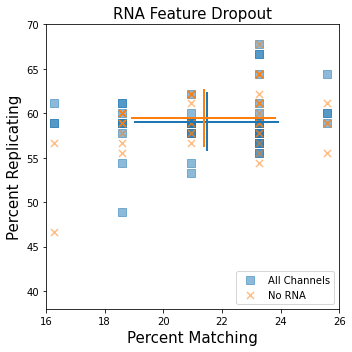

In [7]:
# C
group = "dropout"

df_subset = rna_drop_df[
    (rna_drop_df["sphering"] == True) &
    # Drop runs on all profiles, including those that don't even have an RNA channel
    # (not ideal, but saves time re-running)
    # So only plot profiles that did acquire the RNA channel
    (rna_drop_df["channel_names"].str.contains("RNA")) &
    (~rna_drop_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig,
    ax_=ax
)
utilssphering.group_plot(
    df_subset, 
    x="Percent_Matching", 
    y="Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True,
    legend_location="lower right",
    alpha=0.5,
    use_markers=True,
    s=50,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title="RNA Feature Dropout",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
)

fig.savefig("(C)-rep-vs-match-RNA-dropout.png", dpi=300)

In [71]:
# For RNA channel dropouts, get the Percent Score for +/- dropout

def format_column_names(column_name):
    """
    For a given string, hyphens and underscores are replaced with spaces and 
    first letters are capitalised.
    """
    return column_name.title().replace("-", " ").replace("_", " ")

def aggregate_duplicates(df):
    """
    Group data on setting columns, calculate the mean for grouped rows
    (which are therefore duplicates).

    The returned dataframe will not contain Assay_Plate_Barcode, since 
    the unique barcodes cannot be reconciled into an aggregated mean, 
    so are therefore dropped.
    """
    print(len(df.columns))
    # Columns to not be used for grouping
    non_group_cols = [
        "Assay_Plate_Barcode",
        "Batch",
        "Vendor",
        "value_95_replicating",
        "Percent_Replicating",
        "Size_MB",
        "Size_MB_std",
        "Percent_Matching",
        "value_95_matching",
        "cell_count",
        "Sites-SubSampled",
        "BF_Zplanes", # Ignore since only one BF zplane is used
        "brightfield_z_plane_used",
        # Remove channel names due to some profiles having "AGP" features 
        # and others having "WGPhalloidin" instead
        "feature_channels_found",
        "channel_names",
        "n_columns", # Dropout csv specific 
        "num_features" # Dropout csv specific 
    ]
    # Find the columns that are not in non_group_cols
    diff = list(set(df.columns) - set(non_group_cols))

    # Group df by setting columns, find the mean, then reset the index
    df = df.groupby(diff, dropna=False, as_index=False).mean()
    print(len(df.columns))
    return df

def make_leaderboard(df, columns, average_duplicates=True):
    """
    Process match_rep_df into a nice leaderboard
    """
    if average_duplicates:
        df = aggregate_duplicates(df)

    # Create an aggregation score for replicating/matching and normalize to the max value
    df["Percent_Score"] = df[["Percent_Replicating", "Percent_Matching"]].mean(axis=1)
    df["Percent_Score"] = (df["Percent_Score"] / df["Percent_Score"].max()) * 100
    df = df.round({"Percent_Score": 1})

    # Sort based on the Percent_Score and then add Place (ie 1st, 2nd, 3rd etc.)
    df = df.sort_values("Percent_Score", ascending=False)[columns]
    df["Place"] = df.reset_index(drop=True).index+1
    
    # Move place column to first position
    df.insert(0, "Place", df.pop("Place"))

    # Format column_names
    df.rename(columns=format_column_names, inplace=True)
    df.rename(columns={"Z Plane": "Z Planes"}, inplace=True)
    df.rename(columns={"Aperture": "NA"}, inplace=True)
    df.rename(columns={"Dry Immersion": "Immersion"}, inplace=True)
    return df

In [72]:
rna_drop_df = pd.read_csv("../../../checkpoints/match_rep_df-RNA-DROP.csv")

df_subset = rna_drop_df[
    (rna_drop_df["sphering"] == True) &
    # Drop runs on all profiles, including those that don't even have an RNA channel
    # (not ideal, but saves time re-running)
    # So only plot profiles that did acquire the RNA channel
    (rna_drop_df["channel_names"].str.contains("RNA")) &
    (~rna_drop_df["Batch"].str.contains("siteSub")) 
    ]

cols = [
    # 'Modality',
    # 'Binning',
    # 'Magnification',
    # 'aperture',
    # "Assay_Plate_Barcode",
    'Number_of_channels',
    "dropout",
    # 'z_plane',
    # 'spinning-disc',
    # 'sites',
    "Percent_Score",
]

# df = df_subset[cols]

df = make_leaderboard(df_subset, cols)

df

32
26


,Place,Number Of Channels,Dropout,Percent Score
12,1,6,(),100.0
6,2,6,"('RNA',)",100.0
15,3,5,(),98.9
7,4,6,(),98.8
23,5,5,(),98.8
22,6,5,"('RNA',)",96.3
14,7,5,"('RNA',)",96.3
10,8,6,"('RNA',)",96.3
4,9,6,(),94.0
2,10,6,"('RNA',)",92.7


loading...../../../../jump-scope/profiles/Scope1_MolDev_20X_9site/Plate2_PCO_6ch_9site_20XPA/Plate2_PCO_6ch_9site_20XPA.csv.gz


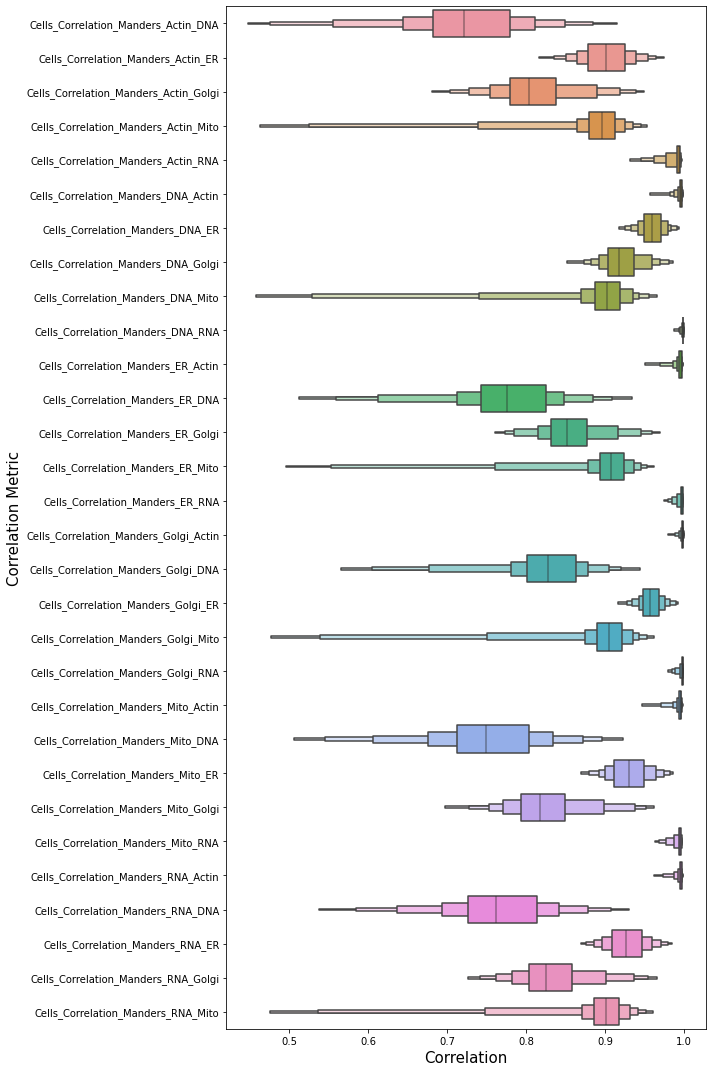

In [4]:
plates = ["Plate2_PCO_6ch_9site_20XPA"]

subset_df = match_rep_df[
    (match_rep_df["Assay_Plate_Barcode"].str.contains(("|").join(plates))) & 
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True) 
    ]

fig, ax = plt.subplots(figsize=(10, 15))

profiles = utilssphering.compare_single_correlations(
    subset_df, 
    "../../../../jump-scope/profiles/", 
    correlation_metric="Cells_Correlation_Manders", 
    fig=fig, 
    ax=ax,
    xlabel="Correlation",
    ylabel="Correlation Metric"
    )


Explainability 

AGP was split into actin and golgi. The Golgi body is a small percentage of the overall cell, but actin is perfuse. Thus, the correlation of Golgi with RNA is high (that is, Golgi_RNA, meaning that there is a lot of RNA signal in the golgi channel).

Other high correlations make sense - high RNA_Actin for example since both of these signals are perfuse throughout the cell.

